In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import warnings

# Suppress the specific warning
warnings.simplefilter(action='ignore', category=UserWarning)

***
## Introduction to a Simple Linear Regression Model

 $[ y = \beta_0 + \beta_1x + \epsilon $]
- $y$ is the response variable.
- $x$ is the predictor variable.
- $\beta_0$ is the intercept of the regression line.
- $\beta_1x$ represents the slope of the regression line.
- $\epsilon$ is the error term.

The coefficients $\beta_0$ and $\beta_1x$ are determined by: 

$ \beta_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2} $

$ \beta_0 = \bar{y} - \beta_1\bar{x} $

***

### Generate and Viasualize random House sizes and prices

In [2]:
# Generate random data for house sizes (in square feet)
np.random.seed(0)  # for reproducibility
house_sizes = np.random.randint(1000, 5000, 100)

# Generate house prices based on size + some random noise
house_prices = 100 * house_sizes + np.random.randint(-50000, 50000, 100)

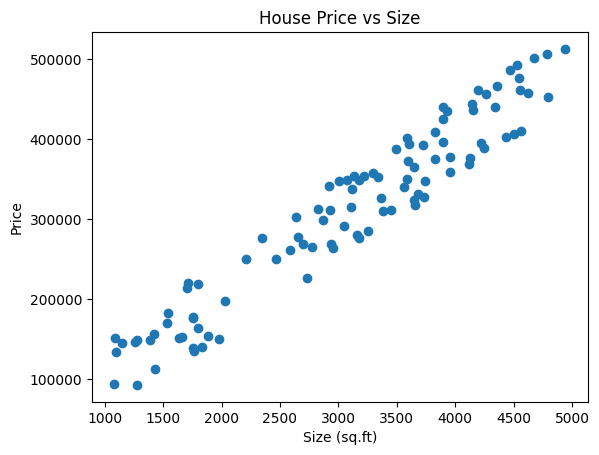

In [3]:
plt.scatter(house_sizes, house_prices)
plt.xlabel('Size (sq.ft)')
plt.ylabel('Price')
plt.title('House Price vs Size')
plt.show()

In [4]:
X = house_sizes.reshape(-1, 1)
y = house_prices

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [5]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [6]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 939343057.3215702


### Plot Prediction (Red Line)

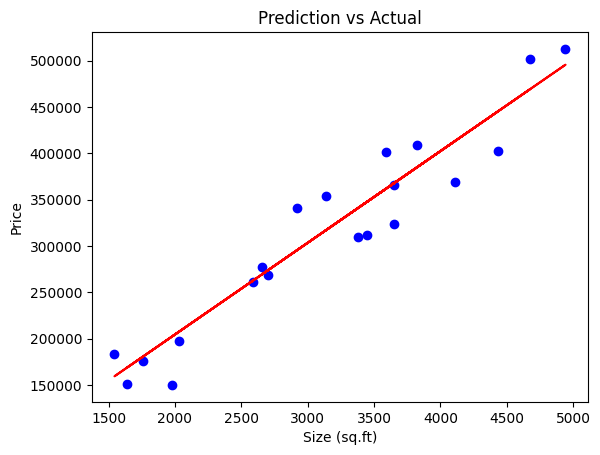

In [7]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Size (sq.ft)')
plt.ylabel('Price')
plt.title('Prediction vs Actual')
plt.show()

#
#

# Using Actual Chicago House Data using Multiple Linear Regression

***
### Multiple Linear Regression :

$[ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_kx_k + \epsilon $]

- $x1$, $x2$,...,$xk$ are the predictor variables.
- $\beta_0$ is the intercept.
- $\beta_1$, $\beta_2$,...., $\beta_k$  represents the slope of the regression line.
- $\epsilon$ is the error term.

When expressed in matrix notation:

$Y = X\beta + \epsilon $


The vector of $\beta$coefficients can be computed as:

$\beta = (X^T X)^{-1} X^T Y$

***


In [8]:
# Read the CSV file into a DataFrame
df = pd.read_csv('realest.csv')

# Extract the specific columns
selected_columns = ['Space', 'Room', 'Bedroom', 'Bathroom', 'Condition', 'Garage', 'Tax', 'Price']
df = df[selected_columns]

#Format Price
df['Price'] = df['Price'] * 10000

df.head()  # Display the first few rows of the new DataFrame

,Space,Room,Bedroom,Bathroom,Condition,Garage,Tax,Price
0,967.0,5.0,2.0,1.5,0.0,0.0,652.0,530000.0
1,815.0,5.0,2.0,1.0,1.0,2.0,1000.0,550000.0
2,900.0,5.0,3.0,1.5,0.0,1.0,897.0,560000.0
3,1007.0,6.0,3.0,1.5,0.0,2.0,964.0,580000.0
4,1100.0,7.0,3.0,1.5,0.0,1.5,1099.0,640000.0


In [9]:
df.describe()

,Space,Room,Bedroom,Bathroom,Condition,Garage,Tax,Price
count,146.000000,156.000000,156.000000,156.000000,156.000000,156.000000,147.000000,156.000000
mean,1097.246575,6.500000,3.166667,1.480769,0.230769,0.846154,911.707483,564743.589744
std,462.540698,1.675247,1.348037,0.529408,0.422682,0.808454,443.263430,128753.070583
min,539.000000,4.000000,1.000000,1.000000,0.000000,0.000000,418.000000,320000.000000
25%,805.250000,5.000000,2.000000,1.000000,0.000000,0.000000,652.500000,460000.000000
50%,965.500000,6.000000,3.000000,1.500000,0.000000,1.000000,821.000000,550000.000000
75%,1220.500000,7.000000,4.000000,2.000000,0.000000,1.500000,1012.500000,650000.000000
max,2295.000000,12.000000,8.000000,3.000000,1.000000,2.000000,2752.000000,900000.000000


In [10]:
df = df.dropna()

In [11]:
# Splitting the features and target variable
features = ['Space', 'Room', 'Bedroom', 'Bathroom', 'Condition', 'Garage', 'Tax']
X = df[features]  # Updated Features
y = df['Price']   # Target variable (Price)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display coefficients for each feature
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 6489028847.086482
            Coefficient
Space      45227.643978
Room       52348.434436
Bedroom   -58411.306119
Bathroom   32674.142640
Condition   1223.107313
Garage     37553.436147
Tax        21903.908809


### Plotting the actual vs. predicted prices

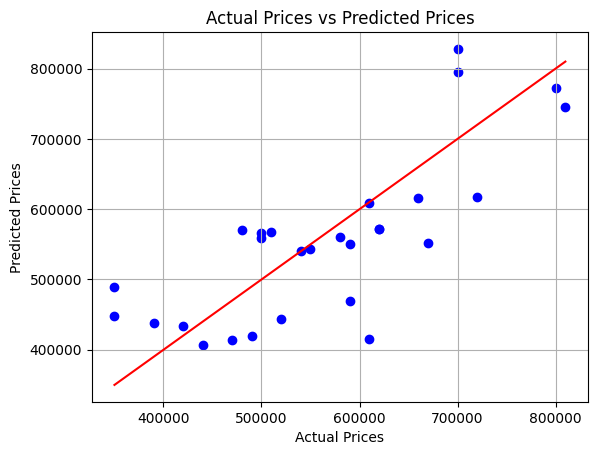

In [12]:
# Plotting the actual vs. predicted prices
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect prediction


plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')

plt.grid(True)
plt.show()


### Predict Price of Specific House

In [13]:
# Provided details for the new house
new_house_data = [[820, 5, 2, 2, 1 ,1 ,1000]]

# Standardize the features of the new house
new_house_data_standardized = scaler.transform(new_house_data)

# Predict the price using the trained model
predicted_price = model.predict(new_house_data_standardized)

print(f"Predicted Price for the house: ${predicted_price[0]:,.2f}")

Predicted Price for the house: $585,804.66


### Ploting Prise vs House Features Relations

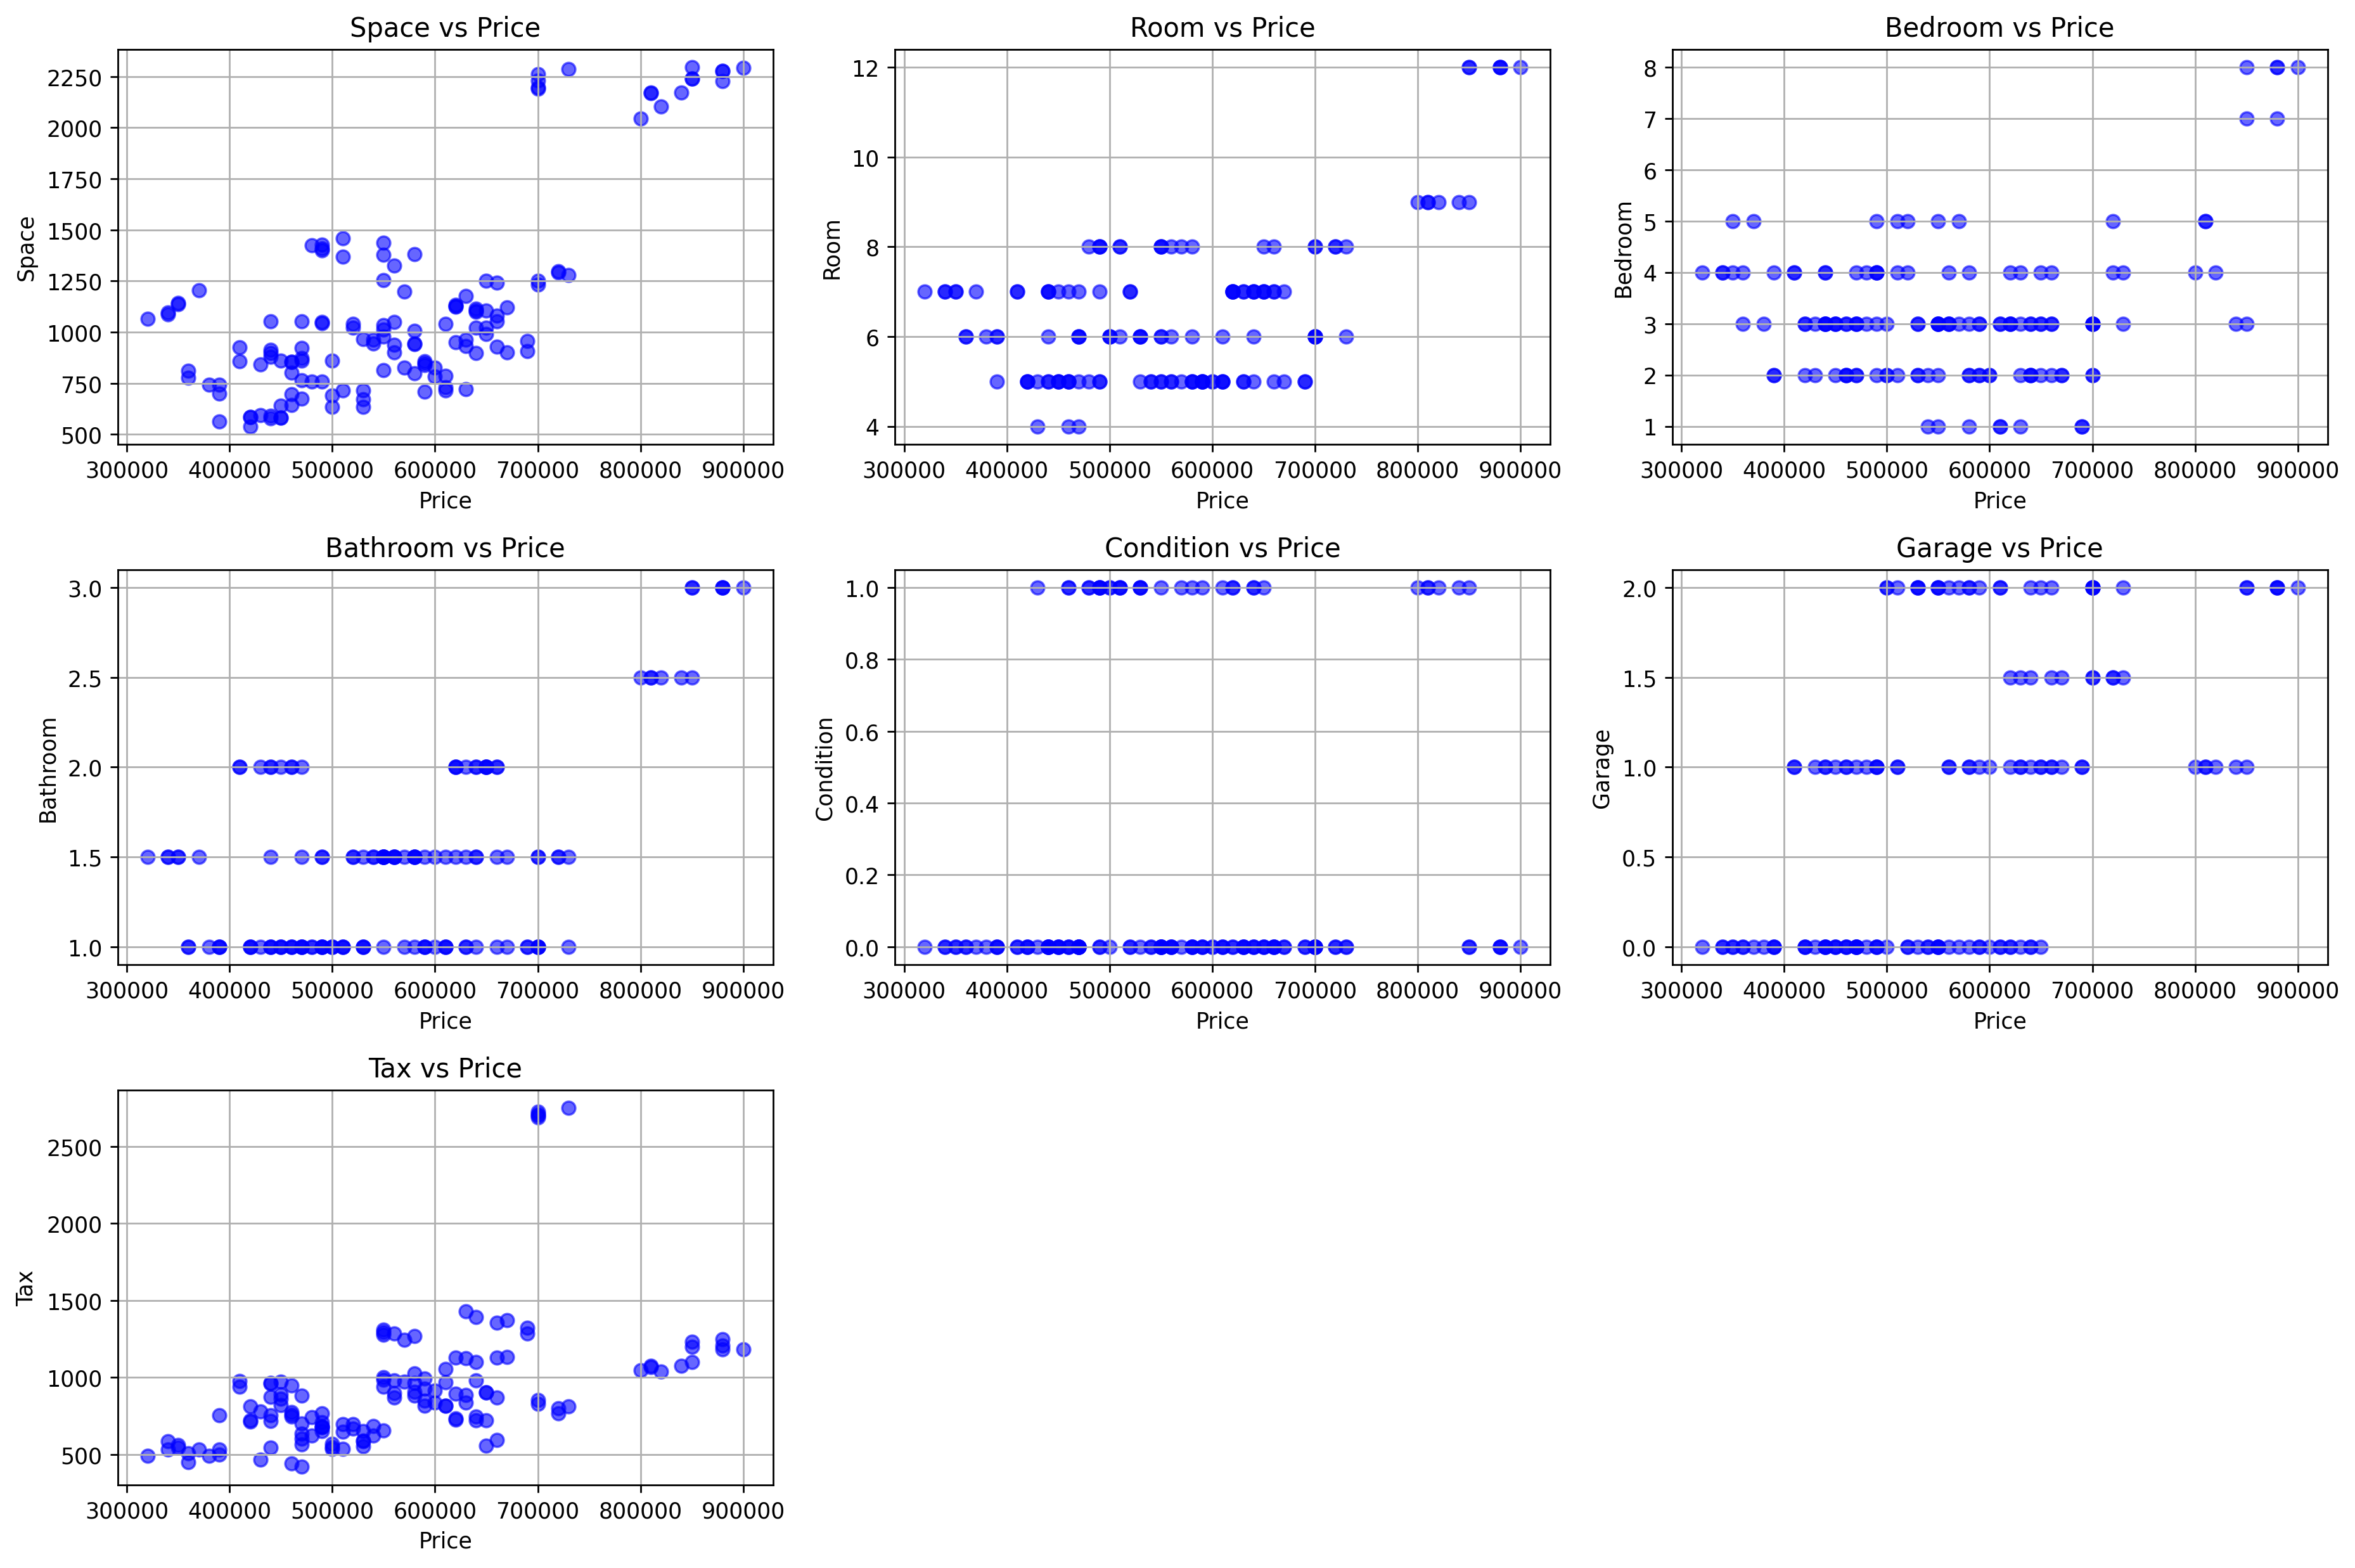

In [14]:
features = ['Space', 'Room', 'Bedroom', 'Bathroom', 'Condition', 'Garage', 'Tax']

# Setting the figure DPI for better clarity
plt.figure(dpi=250, figsize=(15, 10))

# Plotting a scatter plot for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df['Price'], df[feature], color='blue', alpha=0.6)  # Swap the positions
    plt.ylabel(feature)
    plt.xlabel('Price')
    plt.title(f'{feature} vs Price')
    plt.grid(True)

plt.tight_layout()
plt.show()


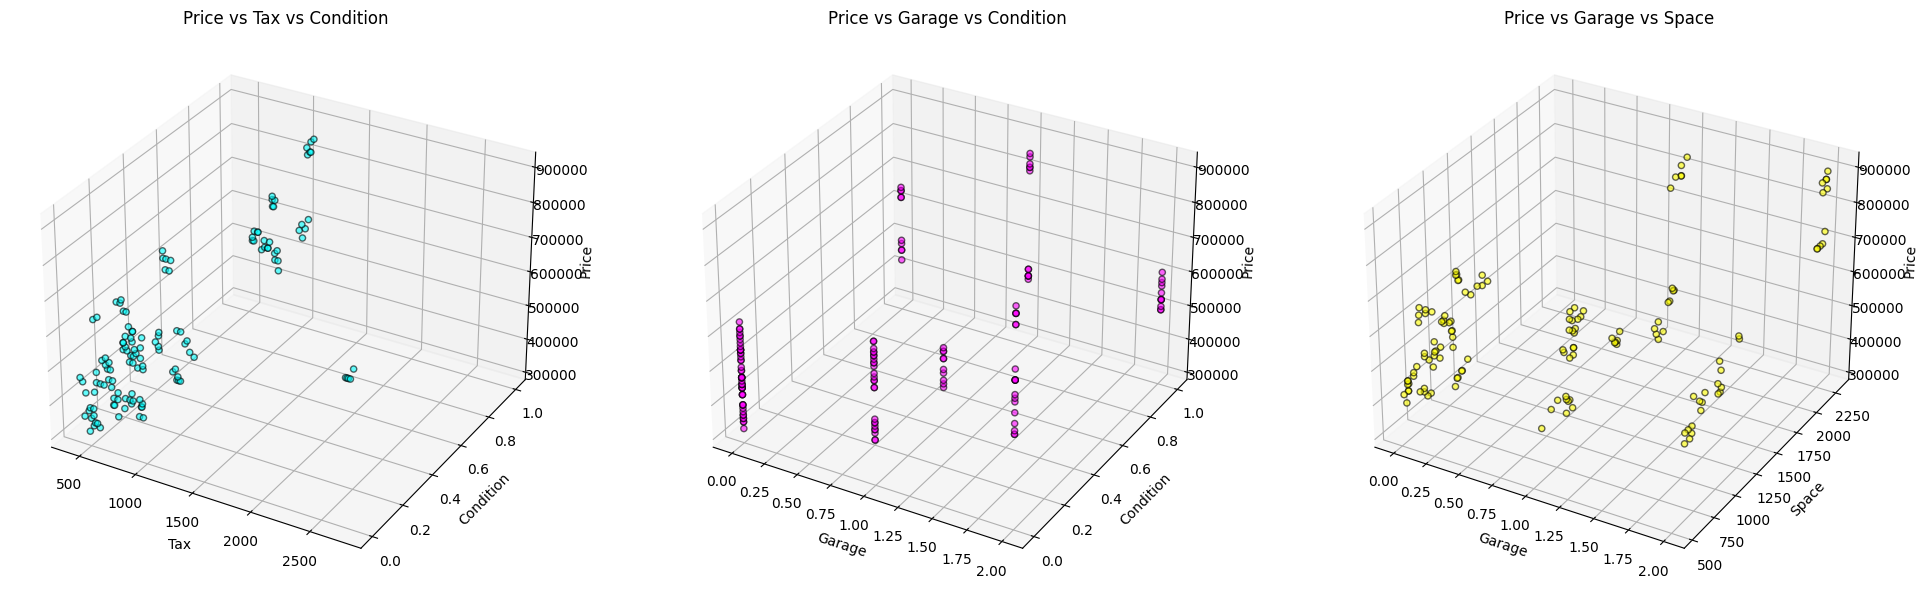

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# Setting up a single figure for the three subplots
fig = plt.figure(figsize=(20, 6))

# First subplot for Price vs Tax vs Condition
ax1 = fig.add_subplot(131, projection='3d')  # Change from 121 to 131
ax1.scatter(df['Tax'], df['Condition'], df['Price'], c='cyan', alpha=0.6, edgecolor='black')
ax1.set_xlabel('Tax')
ax1.set_ylabel('Condition')
ax1.set_zlabel('Price')
ax1.set_title('Price vs Tax vs Condition')

# Second subplot for Price vs Garage vs Condition
ax2 = fig.add_subplot(132, projection='3d') 
ax2.scatter(df['Garage'], df['Condition'], df['Price'], c='magenta', alpha=0.6, edgecolor='black')
ax2.set_xlabel('Garage')
ax2.set_ylabel('Condition')
ax2.set_zlabel('Price')
ax2.set_title('Price vs Garage vs Condition')

# Third subplot for Price vs Garage vs Space
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(df['Garage'], df['Space'], df['Price'], c='yellow', alpha=0.6, edgecolor='black')
ax3.set_xlabel('Garage')
ax3.set_ylabel('Space')
ax3.set_zlabel('Price')
ax3.set_title('Price vs Garage vs Space')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show all three plots together
plt.show()



### Predicting Price for House that user Enters House Features

In [16]:
def get_user_input():
    try:
        size = float(input("Enter the size of the house (in sq.ft): "))
        Rooms = int(input("Enter the number of Rooms: "))
        Bedrooms = int(input("Enter the number of bedrooms: "))
        Bathrooms = float(input("Enter the number of bathrooms: "))
        Condition = float(input("Enter the condition of the house (Good 1, Bad 0): "))
        Garage = int(input("Enter the number of garage spaces: "))
        Tax = float(input("Enter the annual tax amount : "))
        
        return [[size, Rooms, Bedrooms, Bathrooms, Condition, Garage, Tax]]
    
    except ValueError:
        print("Please enter a valid number for the requested data.")
        return None

def predict_price(data):
    # Standardize the input data
    standardized_data = scaler.transform(np.array(data))
    
    # Predict the price using the trained model
    return model.predict(standardized_data)[0]

# Get data from the user
user_data = get_user_input()

# If we got valid data from the user, predict and print the price
if user_data:
    predicted_price = predict_price(user_data)
    print(f"\nThe predicted price for the house with the given features is: ${predicted_price:,.2f}")



Enter the size of the house (in sq.ft):  1200
Enter the number of Rooms:  4
Enter the number of bedrooms:  2
Enter the number of bathrooms:  1
Enter the condition of the house (Good 1, Bad 0):  1
Enter the number of garage spaces:  1
Enter the annual tax amount :  800



The predicted price for the house with the given features is: $523,375.49
